In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('customer_segmentation.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data.drop_duplicates('ID')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
data.Z_CostContact.unique()

array([3], dtype=int64)

In [10]:
data.Z_Revenue.unique()

array([11], dtype=int64)

In [11]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [12]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [13]:
data[data['Income'].isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [14]:
24 / 2240

0.010714285714285714

In [15]:
data.Income.median()

51381.5

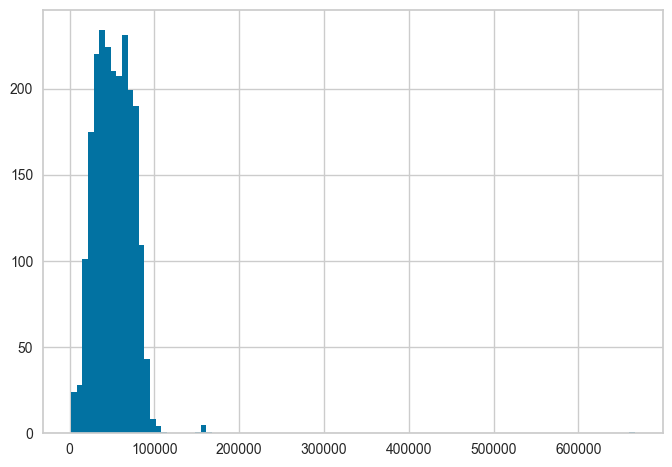

In [16]:
plt.hist(data.Income, 100)
None

In [17]:
data.fillna(data.Income.median(), inplace=True)

In [18]:
data.isna().sum().sum()

0

In [19]:
data.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0
1846,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0
1524,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0
21,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0


In [20]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

C:\Users\Andrew\AppData\Local\Temp\ipykernel_41448\825795003.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [21]:
data.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [22]:
data.Dt_Customer.max()

Timestamp('2014-12-06 00:00:00')

In [23]:
current_date = pd.to_datetime('2015-01-01')

In [24]:
# assumption lets say that the currect date is 1/1/2015
current_date

Timestamp('2015-01-01 00:00:00')

In [25]:
data['Age'] = 2014 - data.Year_Birth

In [26]:
data['days_been_customer'] = current_date - data.Dt_Customer

In [27]:
data.drop(['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

In [28]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,days_been_customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,997 days
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,151 days
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,498 days
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,91 days
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,347 days


In [29]:
data['days_been_customer'] = pd.to_numeric(data['days_been_customer'].dt.days, downcast='integer')

In [30]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,days_been_customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,997
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,151
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,498
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,91
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,347


In [31]:
# since 666.666k is significantly higher than the other customers' income, we will consider it an error and drop it
data = data[data['Income'] < 200000]
data = data[data['Age'] < 110]

In [32]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

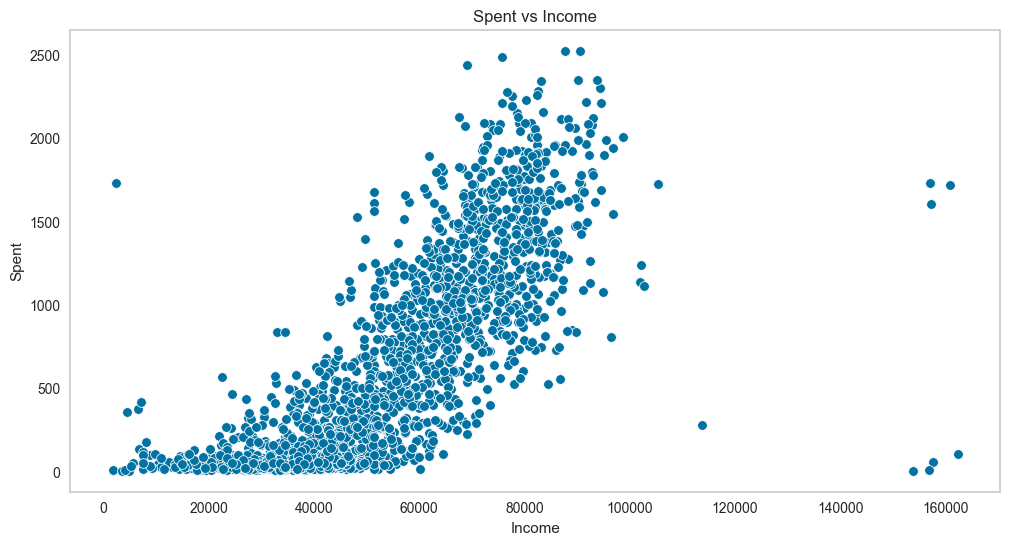


Correlation between Age_on_2014 and Spent: 0.7893749146446831


In [33]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {data['Income'].corr(data['Spent'])}")

In [34]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [35]:
data.Education.value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [36]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [37]:
data['Marital_Status'] = data['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [38]:
data.Marital_Status.replace(to_replace=['Partner','Alone'], value=[1,0], inplace=True)
data.Education.replace(to_replace=['Basic','Graduation', '2n Cycle', 'Master', 'PhD'], value=[0, 1, 2, 3, 4], inplace=True)

In [39]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,days_been_customer,Spent
0,1,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,997,1617
1,1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,151,27
2,1,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,498,776
3,1,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,91,53
4,4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,347,422


In [40]:
data['AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)

In [41]:
data['Children'] = data['Kidhome'] + data['Teenhome']

data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [42]:
# data['Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [43]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'days_been_customer', 'Spent',
       'AcceptedCmp', 'Children'],
      dtype='object')

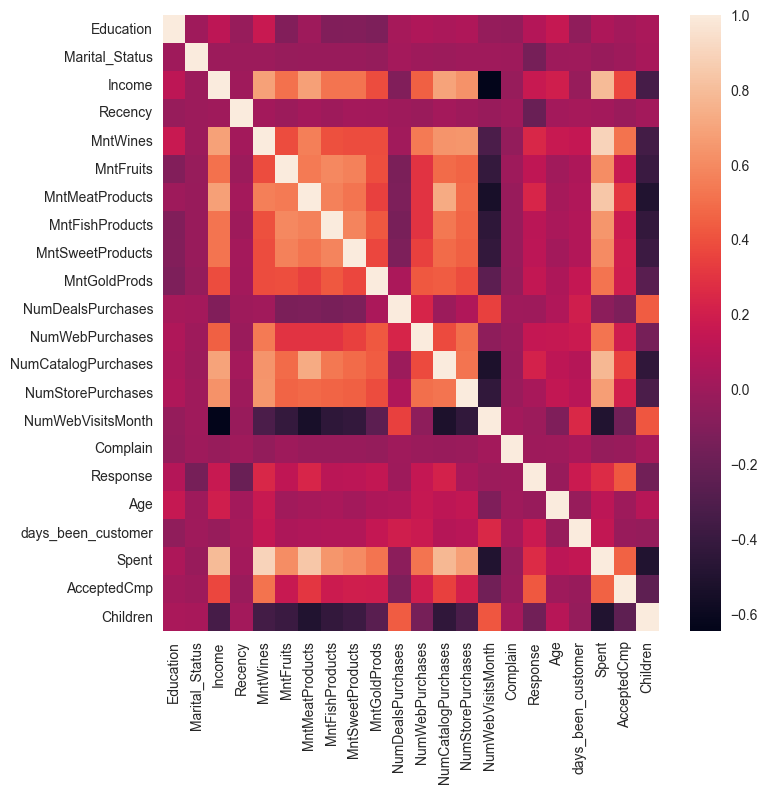

In [44]:
fig, ax=plt.subplots(figsize = (8,8))
ax = sns.heatmap(data.corr(),ax=ax)

In [45]:
data.describe()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,days_been_customer,Spent,AcceptedCmp,Children
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,2.047406,0.644902,51952.614043,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.008945,0.149374,45.101968,538.179785,605.986583,0.297853,0.950805
std,1.277402,0.478650,21411.466851,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.094173,0.356536,11.703281,232.311073,601.865156,0.678737,0.752204
min,0.000000,0.000000,1730.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,26.000000,5.000000,0.000000,0.000000
25%,1.000000,0.000000,35502.500000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,37.000000,366.750000,69.000000,0.000000,0.000000
50%,1.000000,1.000000,51381.500000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,44.000000,539.000000,396.500000,0.000000,1.000000
75%,3.000000,1.000000,68275.750000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,55.000000,712.000000,1045.500000,0.000000,1.000000
max,4.000000,1.000000,162397.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,74.000000,1089.000000,2525.000000,4.000000,3.000000


In [46]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'days_been_customer', 'Spent',
       'AcceptedCmp', 'Children'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Complains')

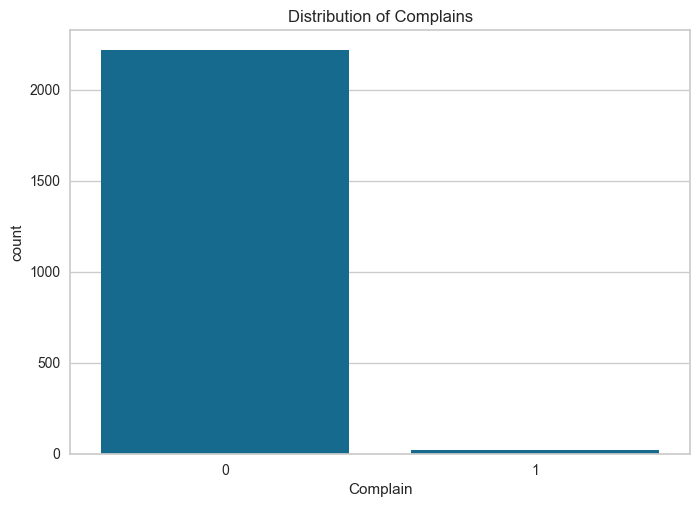

In [47]:
sns.countplot(data, x = 'Complain')
plt.title("Distribution of Complains")

In [48]:
data.drop('Spent', axis=1, inplace=True)

In [49]:
ss = StandardScaler()

ss.fit(data)

X = ss.transform(data)

X

array([[-0.82013359, -1.3476353 ,  0.28894655, ...,  1.97546695,
        -0.43893256, -1.26430757],
       [-0.82013359, -1.3476353 , -0.262003  , ..., -1.6670165 ,
        -0.43893256,  1.39513902],
       [-0.82013359,  0.74204052,  0.91842301, ..., -0.17299551,
        -0.43893256, -1.26430757],
       ...,
       [-0.82013359, -1.3476353 ,  0.234898  , ..., -0.84896466,
         1.0347209 , -1.26430757],
       [ 0.74589434,  0.74204052,  0.80780332, ..., -0.84465913,
        -0.43893256,  0.06541573],
       [ 1.52890831,  0.74204052,  0.04280841, ...,  1.16172065,
        -0.43893256,  1.39513902]])

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


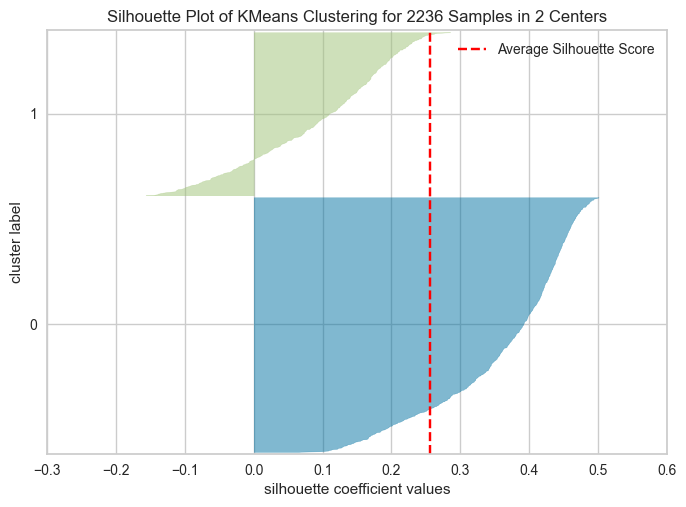

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


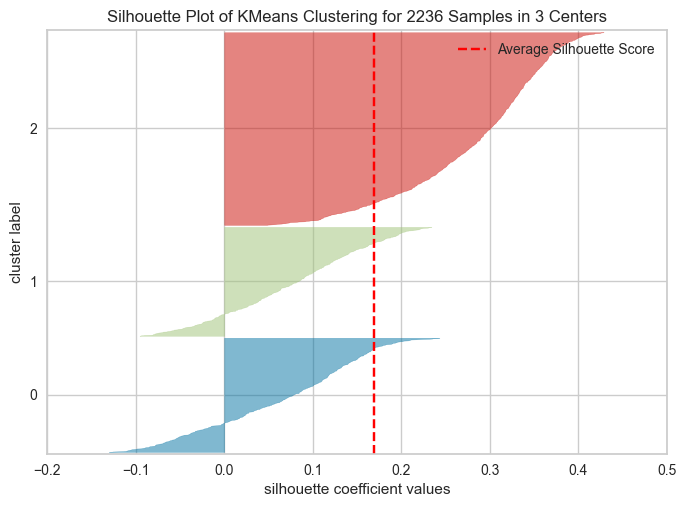

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


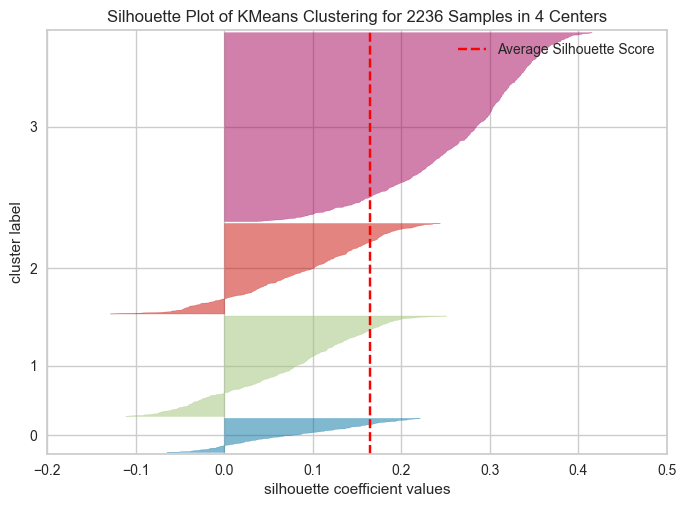

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


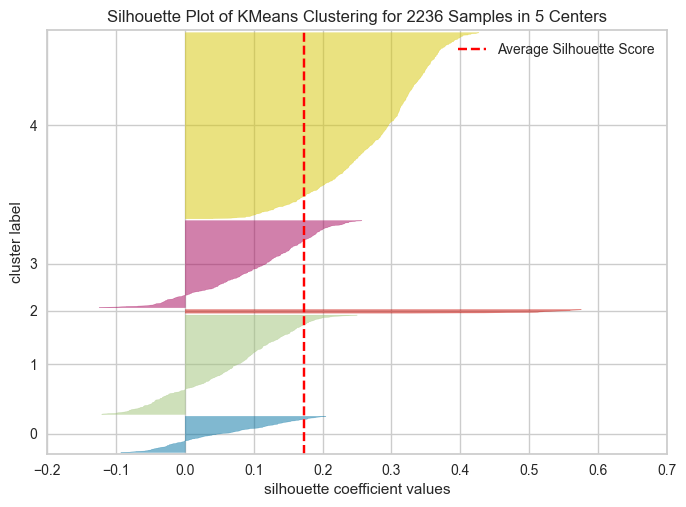

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


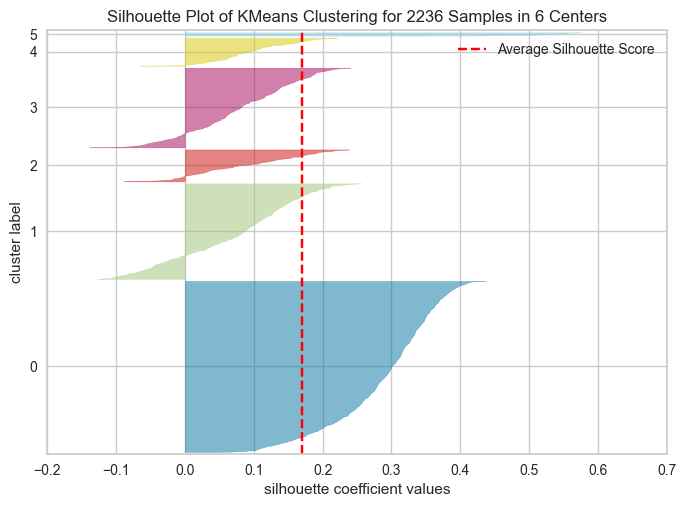

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


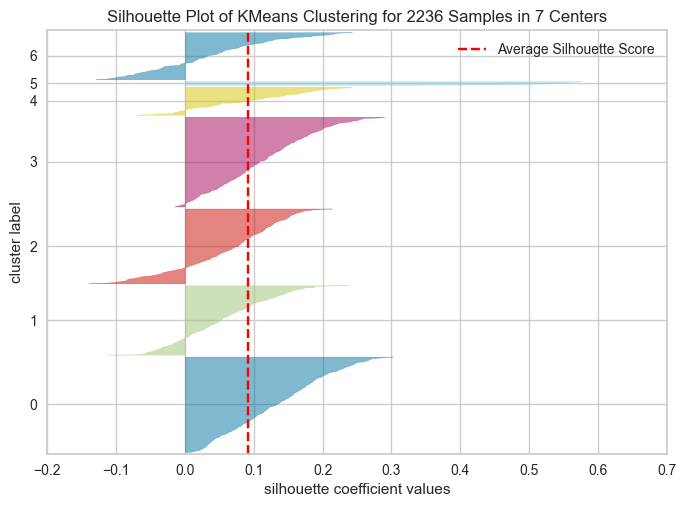

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


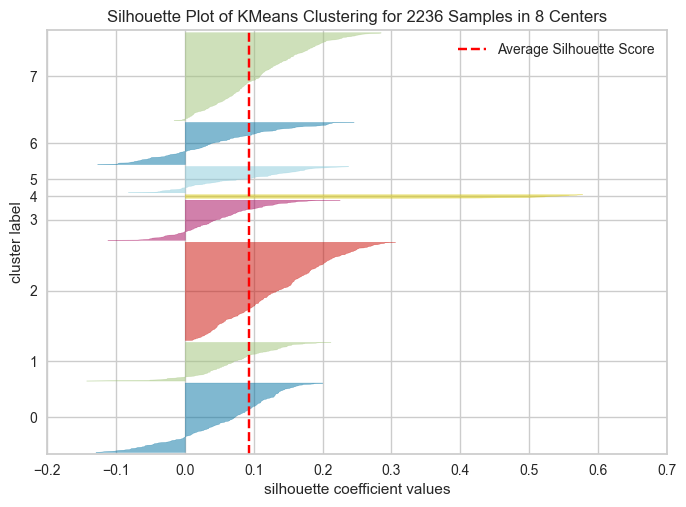

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


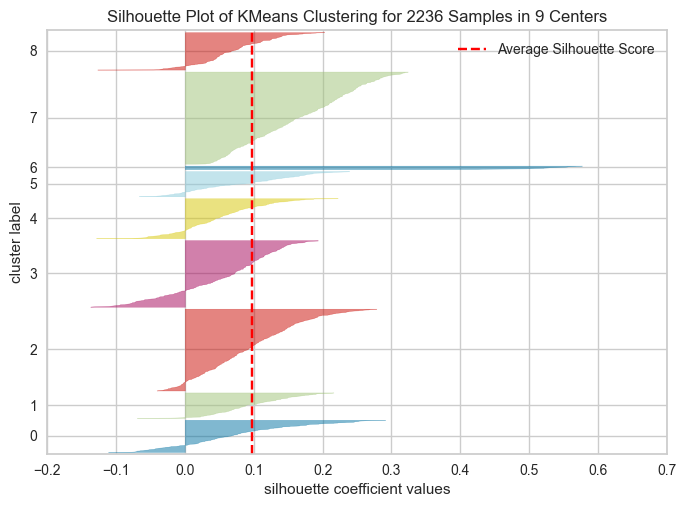

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


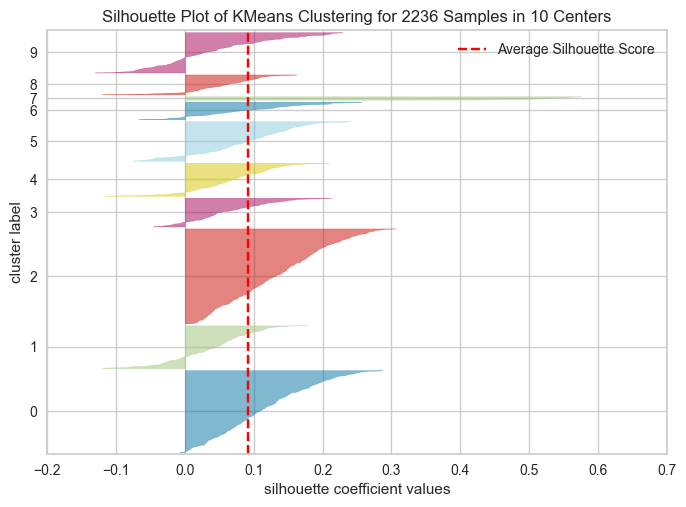

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


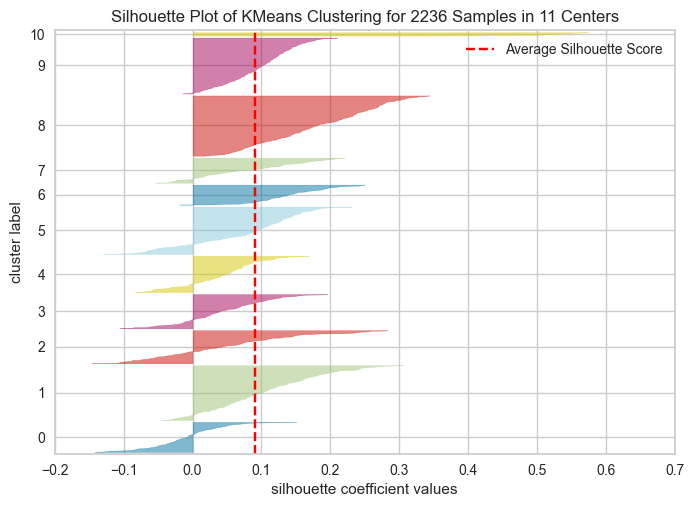

In [50]:
sillhouette_list= []
for i in range(2,12):  
    model_kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(X)
    silhouette_avg = silhouette_score(X, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)

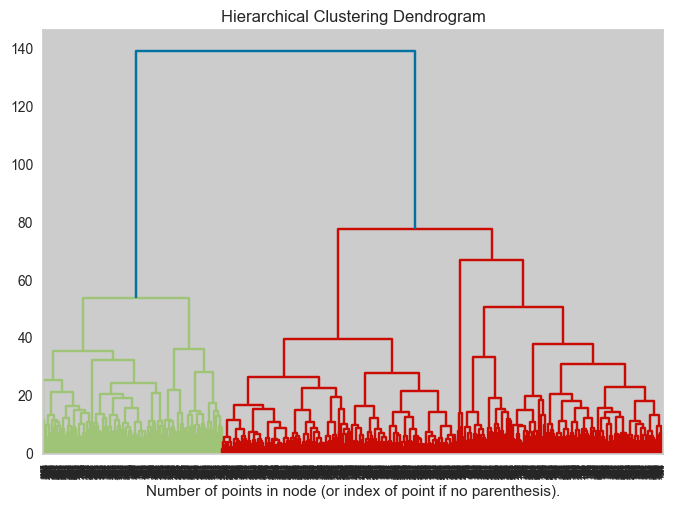

In [51]:
# Create Dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [52]:
inertia_list= []
for i in range(1,20):
    model_kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)

e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Downloads\Blue Data Academy\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Downl

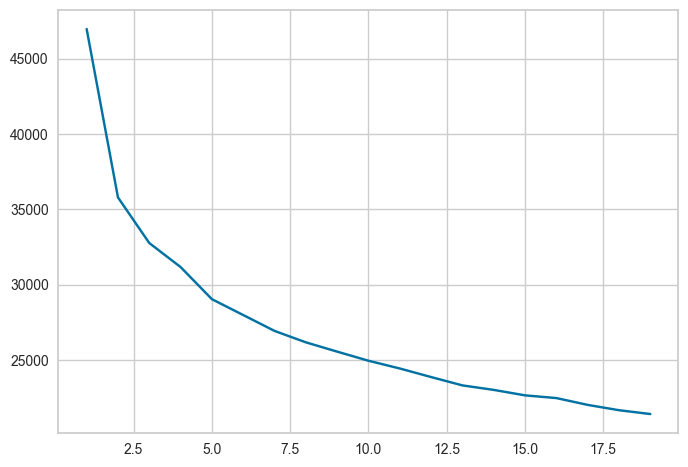

In [53]:
plt.plot([x for x in range(1, 20)], inertia_list)
None

In [54]:
number_clusters = 6

In [55]:
cluster = AgglomerativeClustering(n_clusters=number_clusters, linkage='ward')

In [56]:
clusters = cluster.fit_predict(X)

In [57]:
clusters

array([1, 0, 4, ..., 2, 4, 5], dtype=int64)

In [58]:
data['cluster'] = clusters.tolist()

In [59]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,days_been_customer,AcceptedCmp,Children,cluster
0,1,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,57,997,0,0,1
1,1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,151,0,2,0
2,1,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,49,498,0,0,4
3,1,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,91,0,1,0
4,4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33,347,0,1,2


In [60]:
data.groupby('cluster').mean()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,days_been_customer,AcceptedCmp,Children
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.878824,0.651765,33910.635882,52.408235,33.032941,4.729412,20.000000,7.523529,4.852941,13.143529,1.861176,1.934118,0.435294,3.165882,6.392941,0.0,0.000000,42.300000,492.334118,0.050588,1.248235
1,2.200957,0.521531,77754.370813,43.344498,802.296651,58.258373,460.607656,84.004785,64.679426,73.478469,1.334928,5.349282,5.923445,8.124402,3.550239,0.0,0.751196,43.645933,582.444976,1.622010,0.205742
2,2.349265,0.661765,56727.033088,49.393382,387.253676,16.455882,118.126838,24.229779,17.976103,49.279412,3.571691,5.639706,2.623162,7.093750,5.604779,0.0,0.003676,48.751838,542.299632,0.178309,1.143382
3,1.500000,0.650000,45672.400000,50.750000,176.700000,25.100000,117.700000,26.700000,18.200000,27.600000,2.400000,3.700000,2.100000,5.400000,5.850000,1.0,0.150000,45.650000,639.550000,0.150000,1.200000
4,1.816934,0.718535,72365.159039,52.070938,502.647597,70.091533,404.032037,97.613272,69.379863,82.727689,1.681922,5.480549,5.549199,8.741419,2.993135,0.0,0.011442,46.448513,548.235698,0.224256,0.391304
5,2.380682,0.522727,43720.525568,31.693182,286.443182,14.051136,96.198864,20.494318,13.903409,47.187500,3.488636,4.778409,2.573864,4.448864,7.062500,0.0,0.948864,45.676136,657.806818,0.488636,1.164773


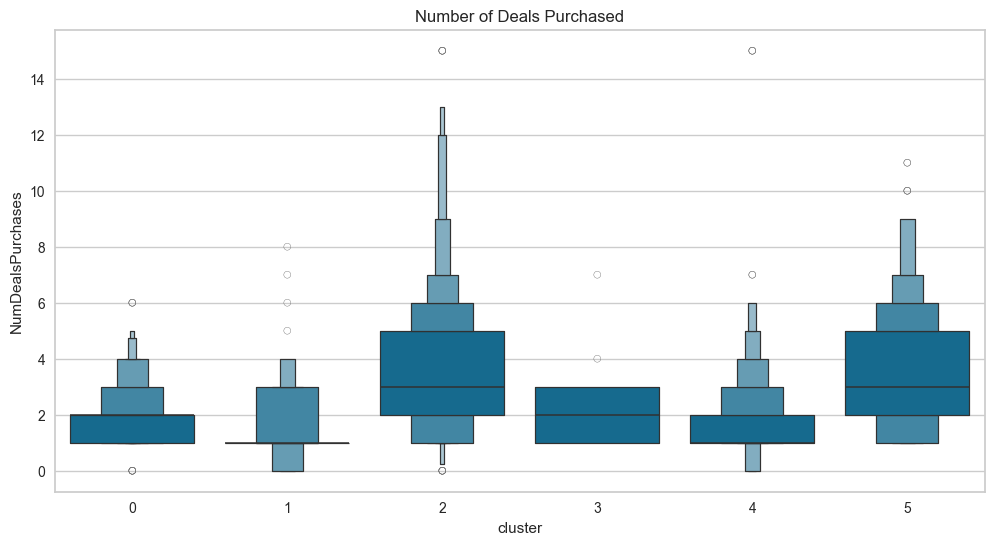

In [61]:
plt.figure(figsize = (12, 6))
sns.boxenplot(data, x = 'cluster', y = 'NumDealsPurchases')
plt.title("Number of Deals Purchased")
plt.show()

In [62]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,days_been_customer,AcceptedCmp,Children,cluster
0,1,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,57,997,0,0,1
1,1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,151,0,2,0
2,1,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,49,498,0,0,4
3,1,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,91,0,1,0
4,4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33,347,0,1,2


In [69]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [71]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'days_been_customer', 'AcceptedCmp',
       'Children', 'cluster', 'Spent'],
      dtype='object')

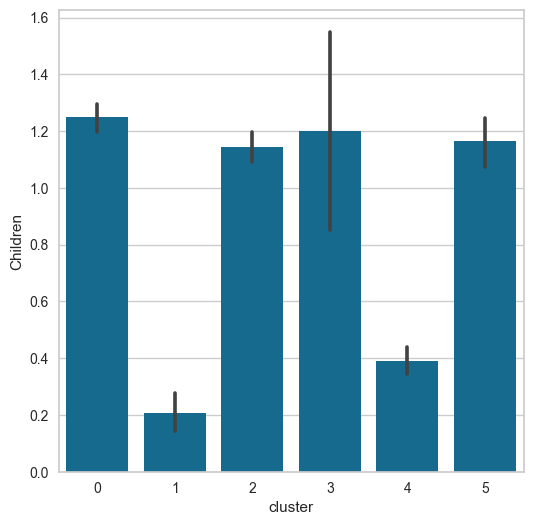

In [75]:
plt.figure(figsize = (6,6))
sns.barplot(x = data['cluster'], y = data['Children'])
plt.show()

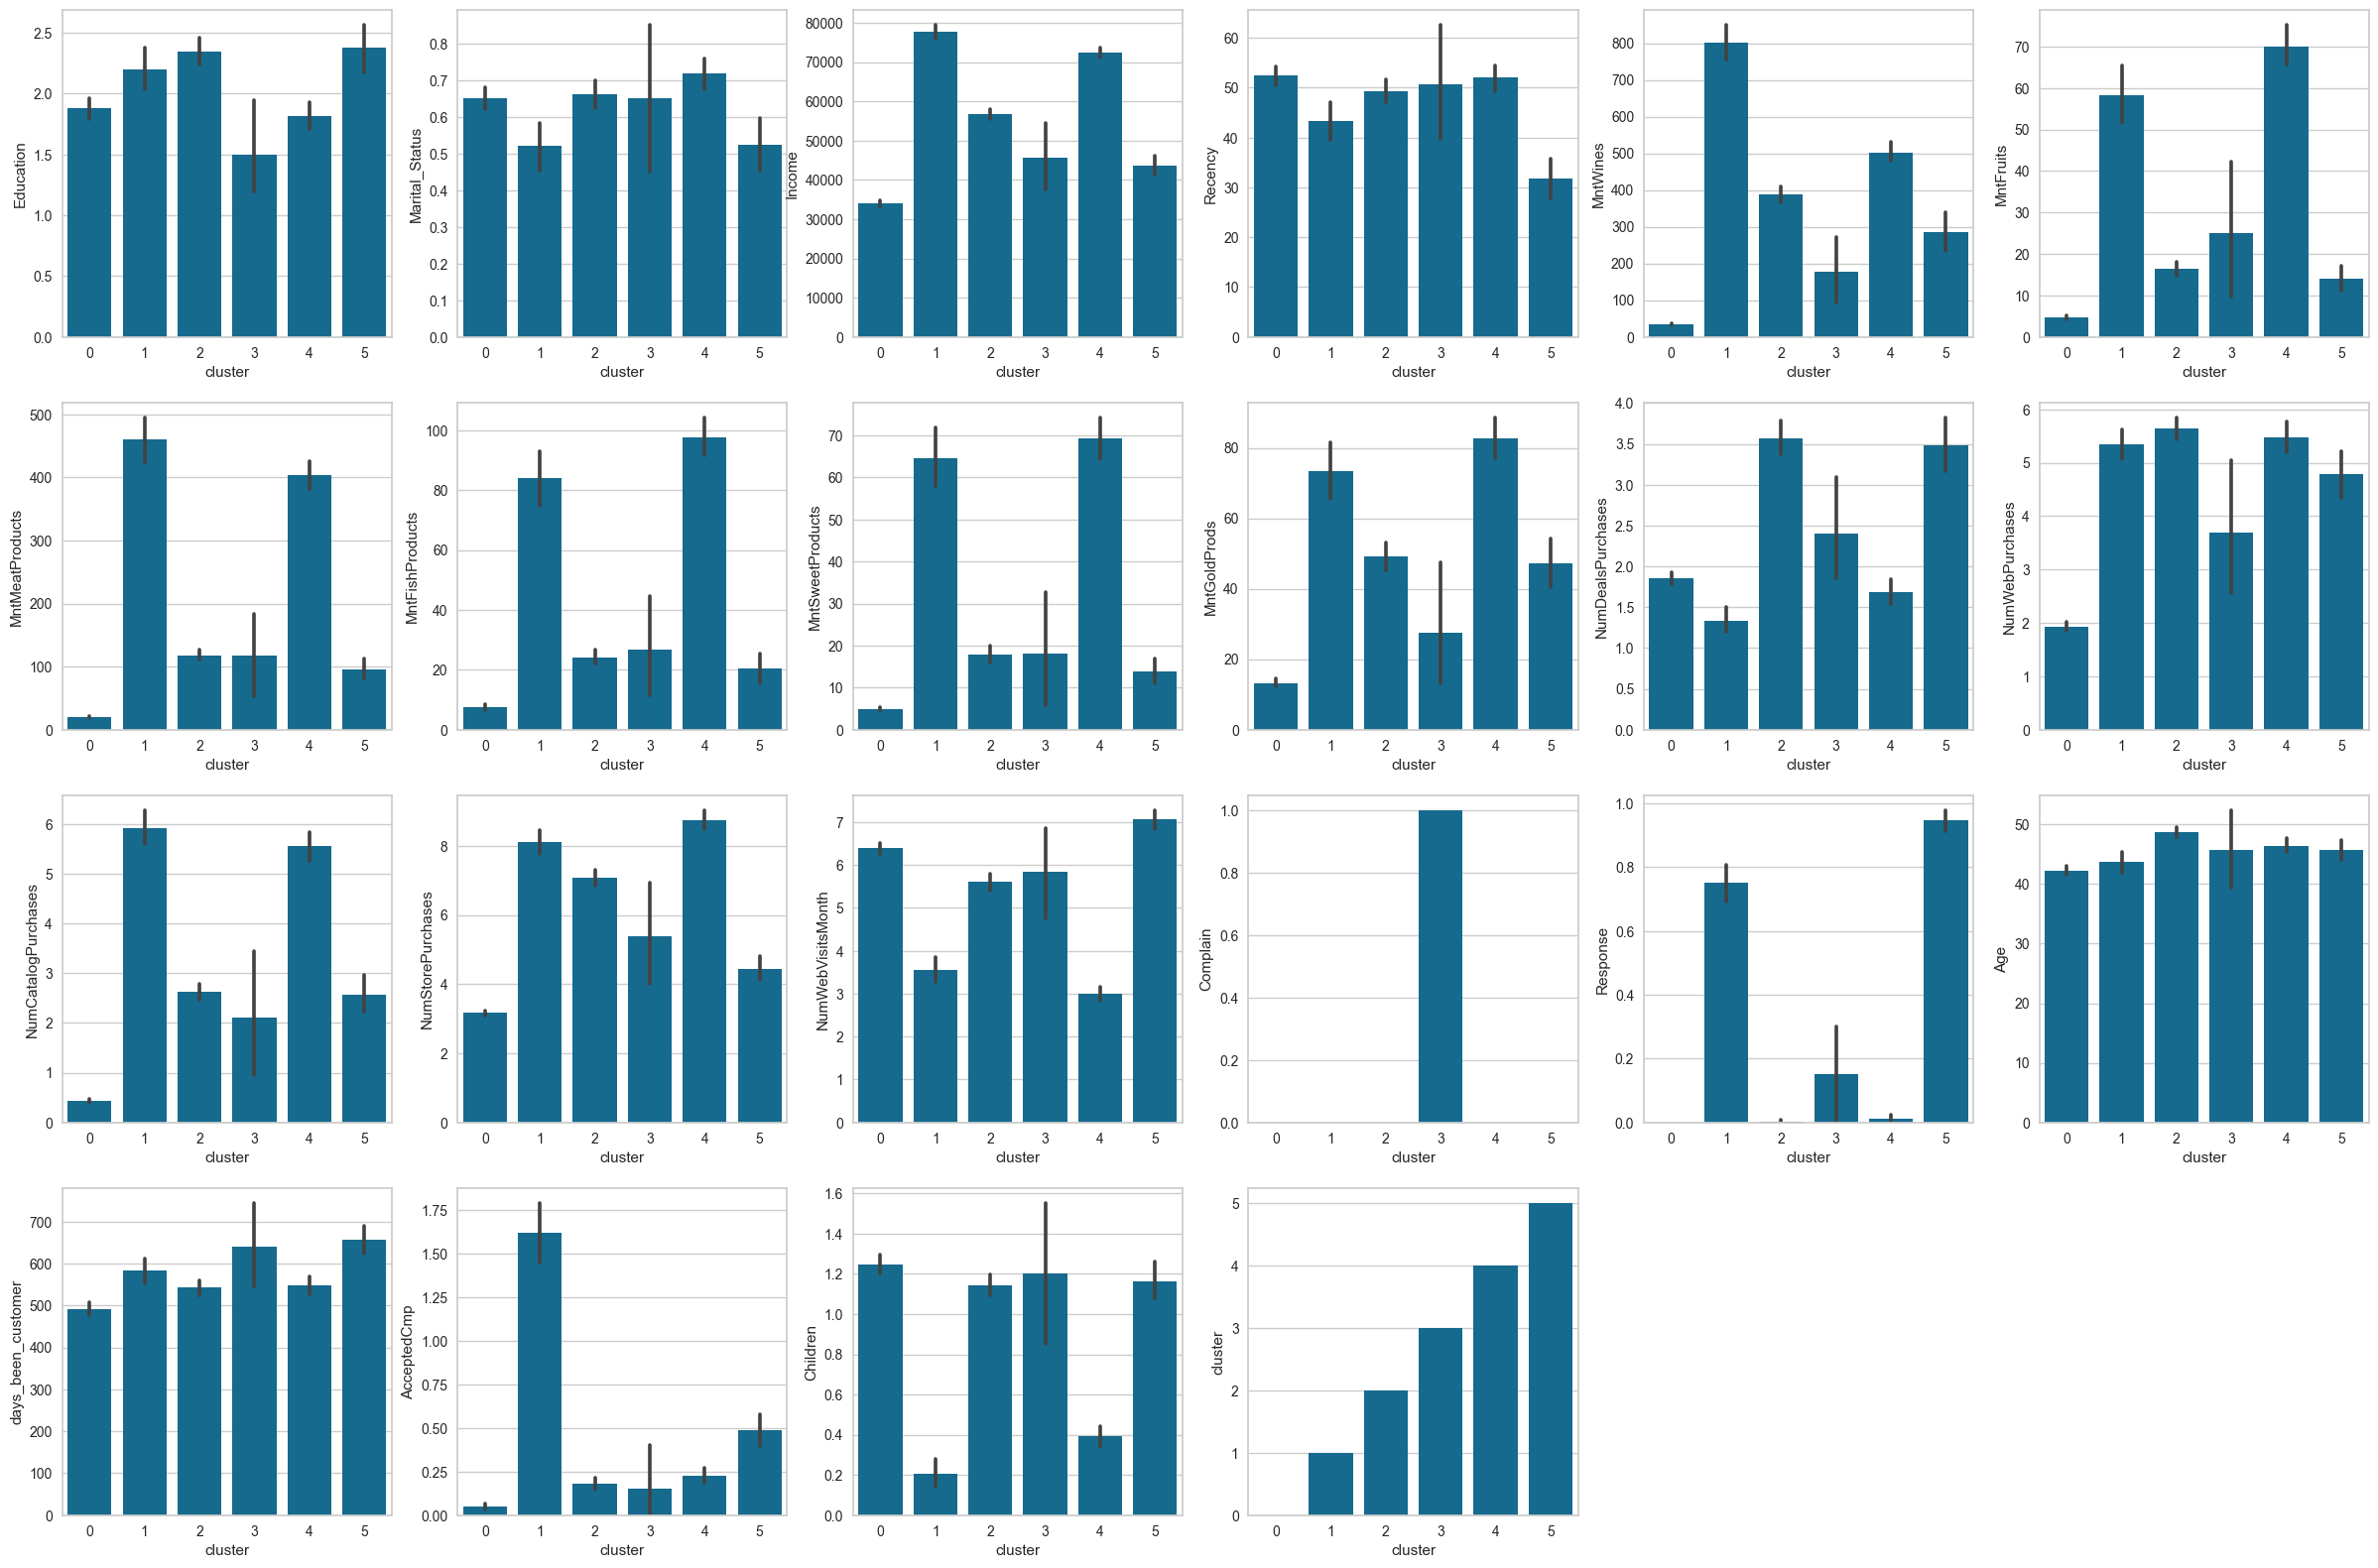

In [56]:
'''get column names'''
columns = list(data)

'''plotting: barplot'''
plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(6, 6, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    sns.barplot(x = data['cluster'], y = data[column], ax=ax)

plt.show()

children
income
education
responded_to_campaign
shopping-online catalogue-purchases
big-spenders looking-for-deals
complained

Cluster 0: Family Savers
Description: Low income families with moderate education levels who prioritize saving money for their children.

Cluster 1: Elite Shoppers
Description: High-income individuals with high levels of education who respond to campaigns and make large purchases & shopping both online and from catalogs.

Cluster 2: Bargain Hunters
Description: Moderate-income individuals with high education levels who are actively looking for deals & shopping online.

Cluster 3: Struggling Families
Description: Low-income families with low education levels who have complaints, possibly related to financial difficulties.

Cluster 4: Affluent Shoppers
Description: High-income individuals with moderate education levels who make significant purchases & shopping both online and from catalogs.

Cluster 5: Educated Shoppers
Description: Low-income families with high education levels who respond to campaigns and are interested in deals & shopping online.